<a href="https://colab.research.google.com/github/MorshedNabil/ML-Lab-Work/blob/master/PDD_using_different_CNN_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset insertion & preprocess**

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = '/content/drive/MyDrive/Plants'
# Make sure inside "dataset" you have subfolders for each class, e.g.:
# dataset/cat/*.jpg
# dataset/dog/*.jpg

In [6]:
import os

import numpy as np
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
import random
import cv2



def load_data(dataset_path):
  data=[]
  labels=[]
  random.seed(42)
  imagePaths = sorted(list(os.listdir(dataset_path))) # listing paths of the 3 folders inside the main dataset folder
  random.shuffle(imagePaths)
  print(imagePaths)

  for img in imagePaths:
    path=sorted(list(os.listdir(dataset_path + '/'+ img)))
    for i in path:
        image = cv2.imread(dataset_path + '/' + img +'/'+ i) # Added '/' here
        if image is not None: # Added check here
            image = cv2.resize(image, (224,224)) # resizing the each image
            image = img_to_array(image)
            data.append(image)
            l = label = img
            labels.append(l)
        else:
            print(f"Warning: Could not read image file {dataset_path + '/' + img + '/' + i}. Skipping.") # Added warning
  data = np.array(data, dtype="float32") / 255.0 #normalizing images
  labels = np.array(labels)
  mlb = LabelBinarizer()
  labels = mlb.fit_transform(labels)
  print(f"first 5 labels: {labels[:5]}")

  (xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.25,random_state=42)
  print(f"train shape: {xtrain.shape}, test shape: {xtest.shape}")
  return xtrain, ytrain, xtest, ytest, mlb # Return mlb here

In [7]:
# train test split
X_train, y_train, X_test, y_test, mlb = load_data(data_path)

#print("Class labels:", y_train)

['Potato_Late_blight', 'Potato_Early_blight', 'Potato_healthy']
first 5 labels: [[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
train shape: (1629, 224, 224, 3), test shape: (543, 224, 224, 3)


# **DenseNet Model Initialization & Train**

In [ ]:
# Fit model (DenseNet121)
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

num_classes = y_train.shape[1] # Get the number of classes from the shape of y_train

base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224,224,3))
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(num_classes, activation="softmax")(x) # Use num_classes here
model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=5) # Use X_train, y_train, X_test, y_test

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8775 - loss: 0.3345 - val_accuracy: 0.4899 - val_loss: 2.8623
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - accuracy: 0.9748 - loss: 0.0685 - val_accuracy: 0.4899 - val_loss: 10.0772
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.9979 - loss: 0.0110 - val_accuracy: 0.7882 - val_loss: 1.5128
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.9937 - loss: 0.0241 - val_accuracy: 0.9098 - val_loss: 0.2563
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - accuracy: 0.9800 - loss: 0.0562 - val_accuracy: 0.6151 - val_loss: 3.0219


# **Model Evaluation (DenseNet)**

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6316 - loss: 3.0694
Validation Loss: 3.0219
Validation Accuracy: 0.6151


In [ ]:
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 807ms/step


In [ ]:
# Now you can access the class names using mlb.classes_
class_labels = mlb.classes_
print("Class names:", class_labels)

# Example of how to get the true class name for the first test sample
first_true_class_index = np.argmax(y_test[0])
first_true_class_name = class_labels[first_true_class_index]
print(f"True class name for the first test sample: {first_true_class_name}")

# Example of how to get the predicted class name for the first test sample
# Assuming you have already run the prediction cell (ct0ZyT1uGV63) and have y_pred_classes
# first_predicted_class_index = y_pred_classes[0]
# first_predicted_class_name = class_labels[first_predicted_class_index]
# print(f"Predicted class name for the first test sample: {first_predicted_class_name}")

Class names: ['Potato_Early_blight' 'Potato_Late_blight' 'Potato_healthy']
True class name for the first test sample: Potato_Early_blight


In [ ]:
y_test

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [ ]:
# True labels
y_true_indices = np.argmax(y_test, axis=1) # Get the indices of the true classes

# Class labels (from mlb object)
# Make sure you have run the cell that calls load_data and receives the mlb object
# For this cell to work, mlb must be defined in a previous cell
if 'mlb' in globals():
    class_labels = mlb.classes_
    print("Class names:", class_labels)

    # Show first 10 predictions with actual class names
    print("\nFirst 10 predictions with actual class names:")
    for i in range(min(10, len(y_test))):
        true_class_name = class_labels[y_true_indices[i]]
        predicted_class_name = class_labels[y_pred_classes[i]]

        print(f"True: {true_class_name}, Predicted: {predicted_class_name}")
else:
    print("Error: mlb object not found. Please run the cell that loads the data and returns mlb.")

Class names: ['Potato_Early_blight' 'Potato_Late_blight' 'Potato_healthy']

First 10 predictions with actual class names:
True: Potato_Early_blight, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight
True: Potato_Early_blight, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight
True: Potato_healthy, Predicted: Potato_healthy
True: Potato_healthy, Predicted: Potato_Late_blight
True: Potato_Late_blight, Predicted: Potato_Late_blight


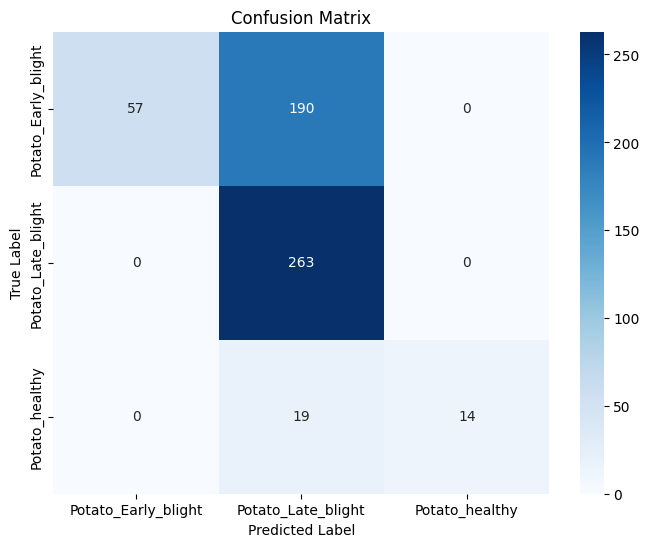

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_true_indices, y_pred_classes)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **EfficientNet Model initialization & Train**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
model = models.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

model.fit(X_train, y_train, epochs=10, verbose=2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3)              │     4,053,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 4,011,391 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/10
51/51 - 143s - 3s/step - accuracy: 0.7551 - loss: 1.2717
Epoch 2/10
51/51 - 6s - 120ms/step - accuracy: 0.8649 - loss: 0.4086
Epoch 3/10
51/51 - 10s - 201ms/step - accuracy: 0.9018 - loss: 0.2959
Epoch 4/10
51/51 - 10s - 203ms/step - accuracy: 0.9263 - loss: 0.2275
Epoch 5/10
51/51 - 10s - 202ms/step - accuracy: 0.9595 - loss: 0.1310
Epoch 6/10
51/51 - 10s - 199ms/step - accuracy: 0.9490 - loss: 0.1602
Epoch 7/10
51/51 - 10s - 198ms/step - accuracy: 0.9601 - loss: 0.1141
Epoch 8/10
51/51 - 10s - 199ms/step - accuracy: 0.9711 - loss: 0.0950
Epoch 9/10
51/51 - 10s - 204ms/step - accuracy: 0.9669 - loss: 0.0978
Epoch 10/10
51/51 - 10s - 201ms/step - accuracy: 0.9730 - loss: 0.0682


# **Model Evaluation (EfficientNet)**

In [ ]:
val_loss_eff, val_acc_eff = model.evaluate(X_test, y_test)
print (f"Loss = {val_loss_eff}")
print (f"Test Accuracy = {val_acc_eff}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5053 - loss: 4.3616
Loss = 4.584354877471924
Test Accuracy = 0.4843462109565735


In [ ]:
# Model prediction
y_pred_eff = model.predict(X_test)
y_pred_classes_eff = np.argmax(y_pred_eff, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step


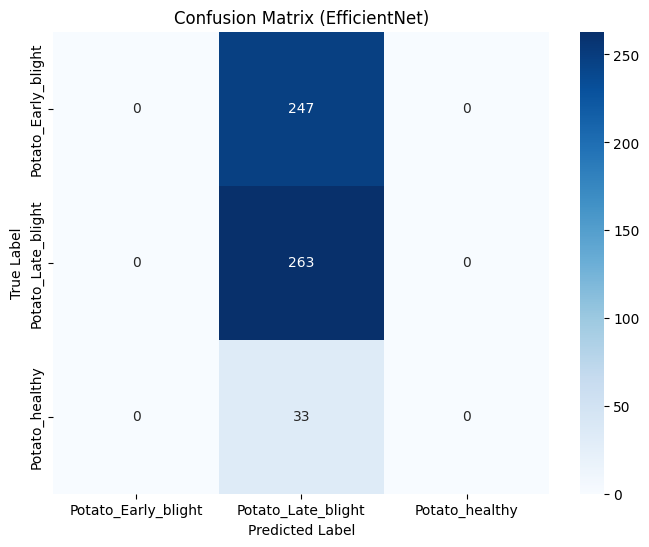

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for EfficientNet
cm_eff = confusion_matrix(y_true_indices, y_pred_classes_eff) # Use y_true_indices and y_pred_classes_eff

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_eff, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (EfficientNet)')
plt.show()

# **Few Shot Learning (Prototypical Network)**